<a href="https://colab.research.google.com/github/nabilaaaa24/Machine-Learning/blob/main/ML_Praktikum_Modul_4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data & Preprocessing

Libraries

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report

### Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Dataset/Prak ML/Banking Dataset.csv', header=0, sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Tampilkan 5 data teratas dan 5 data terbawah dari dataset untuk memahami struktur dan isi data.

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Tampilkan ringkasan statistik dari dataset, termasuk mean, median, deviasi standar, nilai minimum, maksimum, dan quartil.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Preprocessing

Mengatasi Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Encode Categorical Variable

In [ ]:
label_encoders = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Pisahkan fitur (features) dan target (target variable).

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

### Split dataset menjadi 80% data train dan 20% data test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Augmentation

In [ ]:
# Gunakan SMOTE untuk menyeimbangkan kelas pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Tambahkan noise pada kolom numerik
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
def add_noise(data, noise_level=0.005):
    noise = noise_level * np.random.normal(size=data.shape)
    return data + noise
X_train_resampled[numerical_columns] = add_noise(X_train_resampled[numerical_columns])

# Lakukan Min-Max Scaling setelah augmentasi
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 2. Modelling

### Bangun Model Neural Network (1 input layer dg jumlah neuron minimal 64 unit, 1 hidden layer dg jumlah neuron yg anda tentukan sendiri, 1 output layer dengan 1 neuron yang menggunakan aktivasi sigmoid)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Print model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

### Latih Model min 100 epoch

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_resampled,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7794 - loss: 0.4664 - val_accuracy: 0.8018 - val_loss: 0.4237
Epoch 2/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8618 - loss: 0.3403 - val_accuracy: 0.8330 - val_loss: 0.3681
Epoch 3/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8675 - loss: 0.3235 - val_accuracy: 0.8369 - val_loss: 0.3724
Epoch 4/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8703 - loss: 0.3133 - val_accuracy: 0.8173 - val_loss: 0.3853
Epoch 5/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8698 - loss: 0.3137 - val_accuracy: 0.8247 - val_loss: 0.3772
Epoch 6/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8707 - loss: 0.3128 - val_accuracy: 0.8499 - val_loss: 0.3345
Epoch 7/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8687 - loss: 0.3098 - val_accuracy: 0.8419 - val_loss: 0.3531
Epoch 8/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8727 - los

# 3. Evaluasi

### Tampilkan plot akurasi dan loss dari hasil pelatihan model

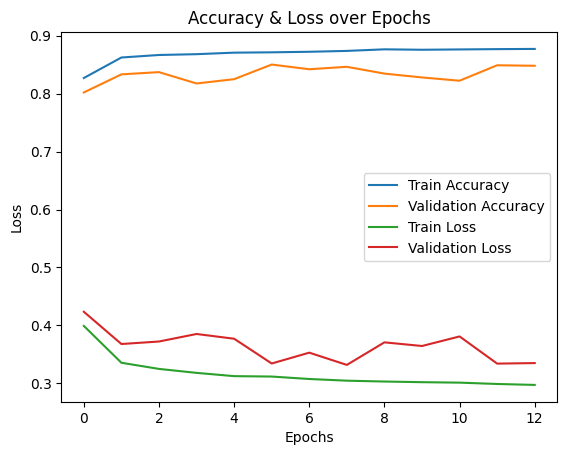

In [ ]:
# Visualisasi akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Visualisasi loss pelatihan dan validasi
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Accuracy & Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Buat Classification Report berserta dengan keterangan labelnya

In [ ]:
# Evaluasi model
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes, zero_division=0))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7952
           1       0.42      0.68      0.52      1091

    accuracy                           0.85      9043
   macro avg       0.68      0.78      0.71      9043
weighted avg       0.89      0.85      0.86      9043

